In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('/content/pw_strength.csv',on_bad_lines='skip')
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
df.shape

(669640, 2)

In [4]:
print(df.isnull().sum())
print(df.isna().sum())

password    1
strength    0
dtype: int64
password    1
strength    0
dtype: int64


In [5]:
df.dropna(inplace=True)

In [6]:
df.strength.value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

In [7]:
x = np.array(df['password'])
y = np.array(df['strength'])

In [8]:
def word(password):
  char = []
  for i in password:
    char.append(i)
  return char

In [9]:
tfidf = TfidfVectorizer(tokenizer=word)
X = tfidf.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=17)

In [11]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

In [12]:
print('Training Score:',rfc.score(X_train,y_train))
print('Testing Score:',rfc.score(X_test,y_test))

Training Score: 0.9997237316388874
Testing Score: 0.9558195448300579


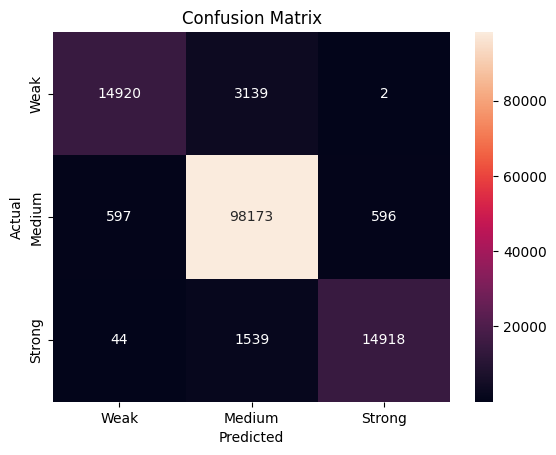

In [13]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=True,xticklabels=['Weak','Medium','Strong'],yticklabels=['Weak','Medium','Strong'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     18061
           1       0.95      0.99      0.97     99366
           2       0.96      0.90      0.93     16501

    accuracy                           0.96    133928
   macro avg       0.96      0.91      0.93    133928
weighted avg       0.96      0.96      0.95    133928



In [15]:
pwd = 'STRONGpasswordw@17#06!'
vecpwd = tfidf.transform([pwd]).toarray()
rfc.predict(vecpwd)

array([2])